# What makes a good athelete?

## Data analysis of Olympians' biometrics

Analysis of Olympic data from the Summer games.

## Background
The modern olympics see athletes competing in a wide range of sports. Visually there are numerous differences between athletes in each sport such as slight jumpers and powerful weightlifters but what makes Olympic medalists? This project will aim to investigate various factors that contributed to medal winners such as:
* age
* height
* weight
* BMI
* population of country
* GDP of country
 
 This work will focus on 5 different sports:
* eventing
* men's 100 m
* men's marathon
* men's shot put
* men's high jump

### Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

### Average biometrics of Olympic athletes

In [3]:
biometrics = pd.read_csv('athlete_results_bio.csv')
print(biometrics.head())
print(biometrics.describe())

print(biometrics.groupby('sport').Age.min())
print(biometrics.groupby('sport').Age.max())
print(biometrics.groupby('sport').height.min())
print(biometrics.groupby('sport').height.max())
print(biometrics.groupby('sport').weight_average.min())
print(biometrics.groupby('sport').weight_average.max())
print(biometrics.groupby('sport').BMI.min())
print(biometrics.groupby('sport').BMI.max())

   Unnamed: 0  level_0  index  athlete_id                  name   sex    born  \
0           0        0      3      114973    Essa Ismail Rashed  Male  1986.0   
1           1        7     13      133041      Vincent Riendeau  Male  1996.0   
2           3       26     66      136267  Shadrack Kipchirchir  Male  1989.0   
3           4       27     70      112346     Paul Etia Ndoumbè  Male  1984.0   
4           5       28     71      112346     Paul Etia Ndoumbè  Male  1984.0   

   height weight         country  ...      pos medal isTeamSport  Year  \
0   165.0     55           Qatar  ...       20   NaN       False  2008   
1   178.0     68          Canada  ...  14 r2/3   NaN       False  2016   
2   173.0     54   United States  ...       19   NaN       False  2016   
3   182.0     78        Cameroon  ...       28   NaN       False  2008   
4   182.0     78        Cameroon  ...       32   NaN       False  2012   

   Olympics weight_low weight_high  weight_average        BMI   Age 

* The average age of athletes is 26.7. The age has a standard deviation of 5.6 showing a wide variety of ages compete in the Olympics.
* The average height and weight are 178.8 cm and 76.0 kg, respectively. These values have standard deviations of 9.6 and 15.9
* The average BMI is 23.6 with a standard deviation of 3.6.

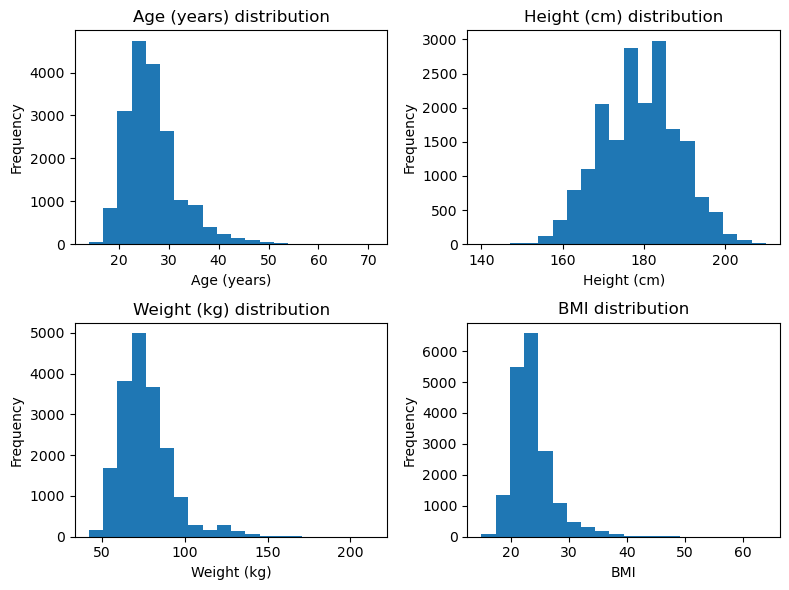

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize = (8, 6))
for i in range(0,4):
    biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
    labels = ['Age (years)', 'Height (cm)', 'Weight (kg)', 'BMI']
    plt.subplot(2,2,i+1)
    plt.hist(biometrics[biometrics_type[i]], bins=20)
    plt.xlabel(labels[i])
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(labels[i]))

plt.tight_layout()
plt.savefig('histogram_all.png')
plt.show()
plt.clf()

### Eventing

In [18]:
biometrics_eventing = biometrics[biometrics.sport == 'Equestrian Eventing']
biometrics_not_eventing = biometrics[biometrics.sport != 'Equestrian Eventing']

biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
for biometric in biometrics_type:
    mean_eventing = round(biometrics_eventing[biometric].mean(),2)
    mean_olympian = round(biometrics_not_eventing[biometric].mean(),2)
    std_eventing = round(biometrics_eventing[biometric].std(),2)
    std_olympian = round(biometrics_not_eventing[biometric].std(), 2)
    print('Eventing {}: {} std: {}'.format(biometric, mean_eventing, std_eventing))
    print('Olympian {}: {} std: {}'.format(biometric, mean_olympian, std_olympian))

Eventing Age: 36.59 std: 8.33
Olympian Age: 26.64 std: 5.49
Eventing height: 178.83 std: 7.08
Olympian height: 178.82 std: 9.64
Eventing weight_average: 72.08 std: 6.62
Olympian weight_average: 76.08 std: 15.91
Eventing BMI: 22.53 std: 1.52
Olympian BMI: 23.65 std: 3.65


In [6]:
for biometric in biometrics_type:
    t_val, p_val = ttest_ind(biometrics_eventing[biometric], biometrics_not_eventing[biometric], equal_var=False)
    print('{} p_val:'.format(biometric), (p_val))

Age p_val: 1.8732476024374564e-35
height p_val: 0.981306516336863
weight_average p_val: 4.095174573601322e-13
BMI p_val: 1.0052305953696515e-17


### Men's 100 m

In [19]:
biometrics_men_100m = biometrics[biometrics.event == '100 metres, Men']
biometrics_men_not_100m = biometrics[biometrics.sport != '100 metres, Men']

biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
for biometric in biometrics_type:
    mean_100m = round(biometrics_men_100m[biometric].mean(),2)
    mean_olympian = round(biometrics_men_not_100m[biometric].mean(),2)
    std_100m = round(biometrics_men_100m[biometric].std(),2)
    std_olympian = round(biometrics_men_not_100m[biometric].std(), 2)
    print('100m {}: {} std: {}'.format(biometric, mean_100m, std_100m))
    print('Olympian {}: {} std: {}'.format(biometric, mean_olympian, std_olympian))

100m Age: 25.41 std: 4.18
Olympian Age: 26.73 std: 5.6
100m height: 177.53 std: 7.45
Olympian height: 178.82 std: 9.62
100m weight_average: 75.19 std: 8.94
Olympian weight_average: 76.04 std: 15.85
100m BMI: 23.84 std: 2.32
Olympian BMI: 23.64 std: 3.64


In [8]:
for biometric in biometrics_type:
    t_val, p_val = ttest_ind(biometrics_men_100m[biometric], biometrics_men_not_100m[biometric], equal_var=False)
    print('{} p_val:'.format(biometric), (p_val))

Age p_val: 1.302534405471324e-07
height p_val: 0.0032610176331487467
weight_average p_val: 0.10717675435692242
BMI p_val: 0.12550484913369


### Men's marathon

In [20]:
biometrics_men_marathon = biometrics[biometrics.event == 'Marathon, Men']
biometrics_men_not_marathon = biometrics[biometrics.sport != 'Marathon, Men']

biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
for biometric in biometrics_type:
    mean_marathon = round(biometrics_men_marathon[biometric].mean(),2)
    mean_olympian = round(biometrics_men_not_marathon[biometric].mean(),2)
    std_marathon = round(biometrics_men_marathon[biometric].std(),2)
    std_olympian = round(biometrics_men_not_marathon[biometric].std(), 2)
    print('Marathon {}: {} std: {}'.format(biometric, mean_marathon, std_marathon))
    print('Olympian {}: {} std: {}'.format(biometric, mean_olympian, std_olympian))

Marathon Age: 30.76 std: 4.63
Olympian Age: 26.73 std: 5.6
Marathon height: 172.93 std: 7.1
Olympian height: 178.82 std: 9.62
Marathon weight_average: 59.95 std: 5.68
Olympian weight_average: 76.04 std: 15.85
Marathon BMI: 20.04 std: 1.46
Olympian BMI: 23.64 std: 3.64


In [10]:
for biometric in biometrics_type:
    t_val, p_val = ttest_ind(biometrics_men_marathon[biometric], biometrics_men_not_marathon[biometric], equal_var=False)
    print('{} p_val:'.format(biometric), (p_val))

Age p_val: 3.2555147497726546e-55
height p_val: 3.643156713035597e-51
weight_average p_val: 4.0681872305012705e-238
BMI p_val: 1.2646792522239352e-204


### Men's shot put

In [21]:
biometrics_men_shot = biometrics[biometrics.event == 'Shot Put, Men']
biometrics_men_not_shot = biometrics[biometrics.sport != 'Shot Put, Men']

biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
for biometric in biometrics_type:
    mean_shot = round(biometrics_men_shot[biometric].mean(),2)
    mean_olympian = round(biometrics_men_not_shot[biometric].mean(),2)
    std_shot = round(biometrics_men_shot[biometric].std(),2)
    std_olympian = round(biometrics_men_not_shot[biometric].std(), 2)
    print('Shot put {}: {} std: {}'.format(biometric, mean_shot, std_shot))
    print('Olympian {}: {} std: {}'.format(biometric, mean_olympian, std_olympian))

Shot put Age: 27.64 std: 3.89
Olympian Age: 26.73 std: 5.6
Shot put height: 191.72 std: 6.54
Olympian height: 178.82 std: 9.62
Shot put weight_average: 126.98 std: 14.29
Olympian weight_average: 76.04 std: 15.85
Shot put BMI: 34.6 std: 4.0
Olympian BMI: 23.64 std: 3.64


In [12]:
for biometric in biometrics_type:
    t_val, p_val = ttest_ind(biometrics_men_shot[biometric], biometrics_men_not_shot[biometric], equal_var=False)
    print('{} p_val:'.format(biometric), (p_val))

Age p_val: 0.004389461080860297
height p_val: 5.635428526306248e-56
weight_average p_val: 4.359031406036326e-91
BMI p_val: 1.5531854822659754e-74


### Men's high jump

In [22]:
biometrics_men_jump = biometrics[biometrics.event == 'High Jump, Men']
biometrics_men_not_jump = biometrics[biometrics.sport != 'High Jump, Men']

biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
for biometric in biometrics_type:
    mean_jump = round(biometrics_men_jump[biometric].mean(),2)
    mean_olympian = round(biometrics_men_not_jump[biometric].mean(),2)
    std_jump = round(biometrics_men_jump[biometric].std(),2)
    std_olympian = round(biometrics_men_not_jump[biometric].std(), 2)
    print('High jump {}: {} std: {}'.format(biometric, mean_jump, std_jump))
    print('Olympian {}: {} std: {}'.format(biometric, mean_olympian, std_olympian))

High jump Age: 25.55 std: 3.56
Olympian Age: 26.73 std: 5.6
High jump height: 192.25 std: 5.82
Olympian height: 178.82 std: 9.62
High jump weight_average: 76.59 std: 6.39
Olympian weight_average: 76.04 std: 15.85
High jump BMI: 20.72 std: 1.49
Olympian BMI: 23.64 std: 3.64


In [14]:
for biometric in biometrics_type:
    t_val, p_val = ttest_ind(biometrics_men_jump[biometric], biometrics_men_not_jump[biometric], equal_var=False)
    print('{} p_val:'.format(biometric), (p_val))

Age p_val: 7.467635833301588e-05
height p_val: 7.408134439081051e-64
weight_average p_val: 0.3000120038451974
BMI p_val: 3.5143319147735586e-55


### Histograms - comparison with Olympians

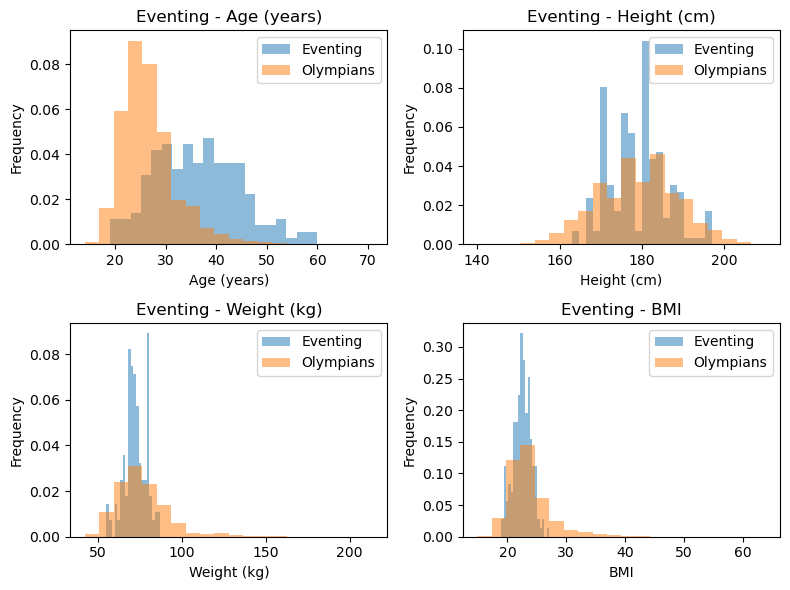

<Figure size 640x480 with 0 Axes>

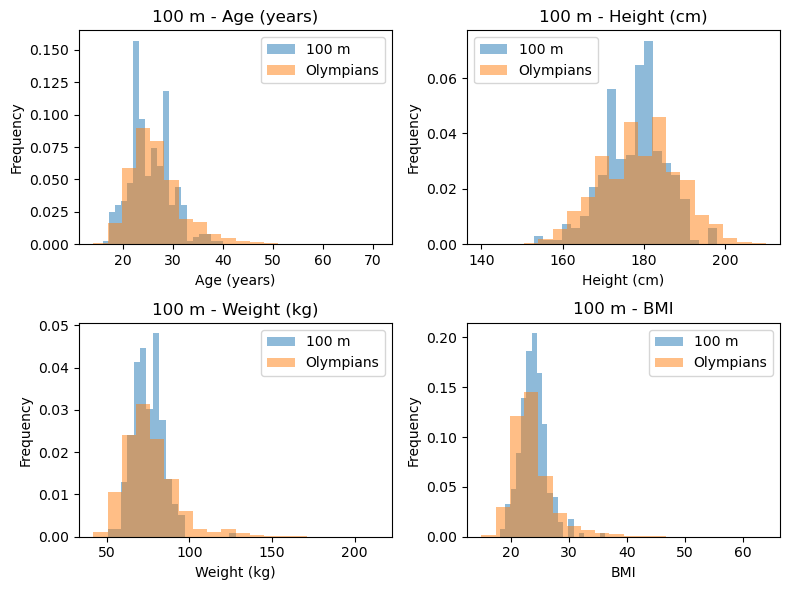

<Figure size 640x480 with 0 Axes>

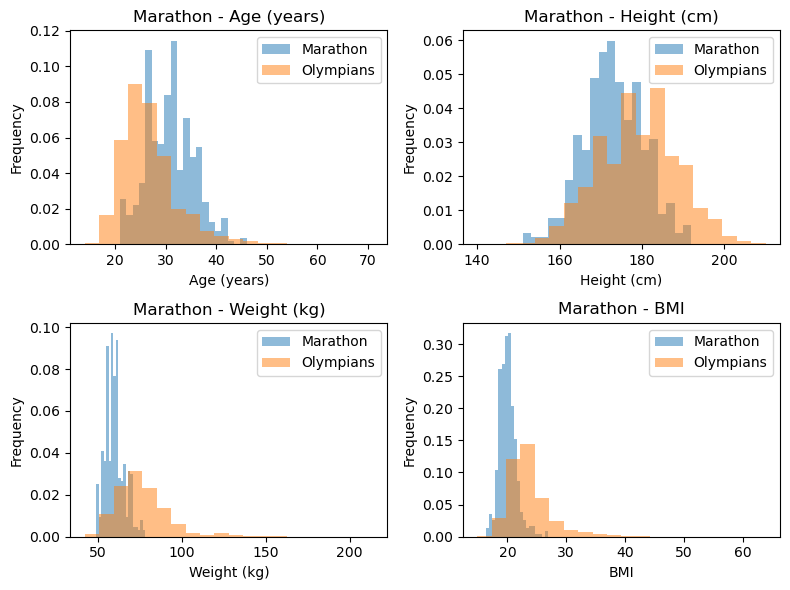

<Figure size 640x480 with 0 Axes>

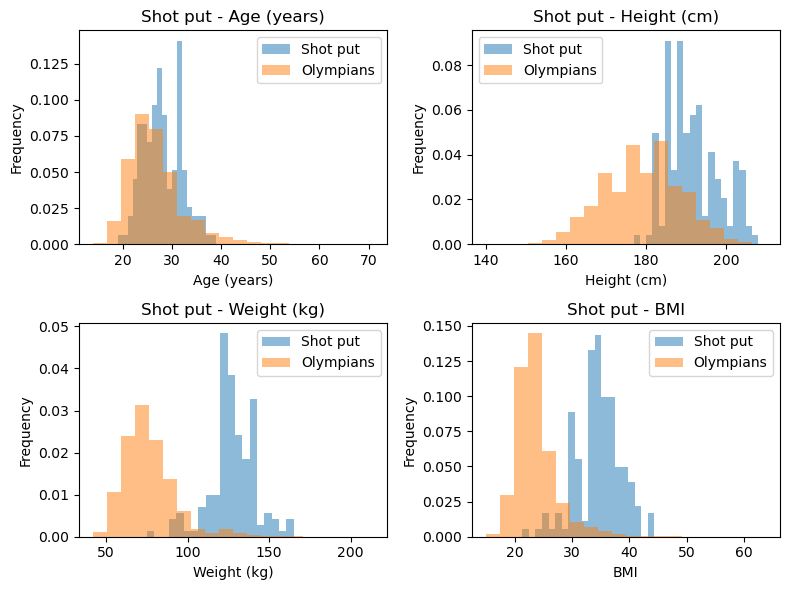

<Figure size 640x480 with 0 Axes>

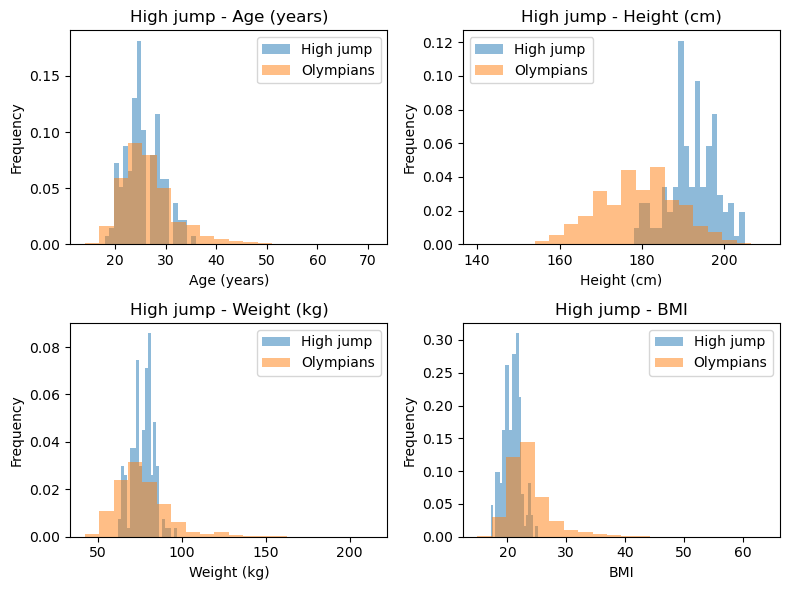

<Figure size 640x480 with 0 Axes>

In [28]:
df = [biometrics_eventing, biometrics_men_100m, biometrics_men_marathon, biometrics_men_shot, biometrics_men_jump]
not_df = [biometrics_not_eventing, biometrics_men_not_100m, biometrics_men_not_marathon, biometrics_men_not_shot, biometrics_men_not_jump]
events = ['Eventing', '100 m', 'Marathon', 'Shot put', 'High jump']
file = ['eventing.png', 'men100m.png', 'marathon.png', 'shotput.png', 'highjump.png']


for j in range(0,5):
    plt.figure(figsize = (8, 6))
    for i in range(0,4):
        biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
        labels = ['Age (years)', 'Height (cm)', 'Weight (kg)', 'BMI']
        plt.subplot(2,2,i+1)
        plt.hist(df[j][biometrics_type[i]], bins=20, label=events[j], density=True, alpha=0.5)
        plt.hist(not_df[j][biometrics_type[i]], bins=20, label='Olympians', density=True, alpha=0.5)
        plt.legend()
        plt.xlabel(labels[i])
        plt.ylabel('Frequency')
        plt.title('{} - {}'.format(events[j], labels[i]))
    plt.tight_layout()
    plt.savefig(file[j])
    plt.show()
    plt.clf()

### Comparison across selected sports

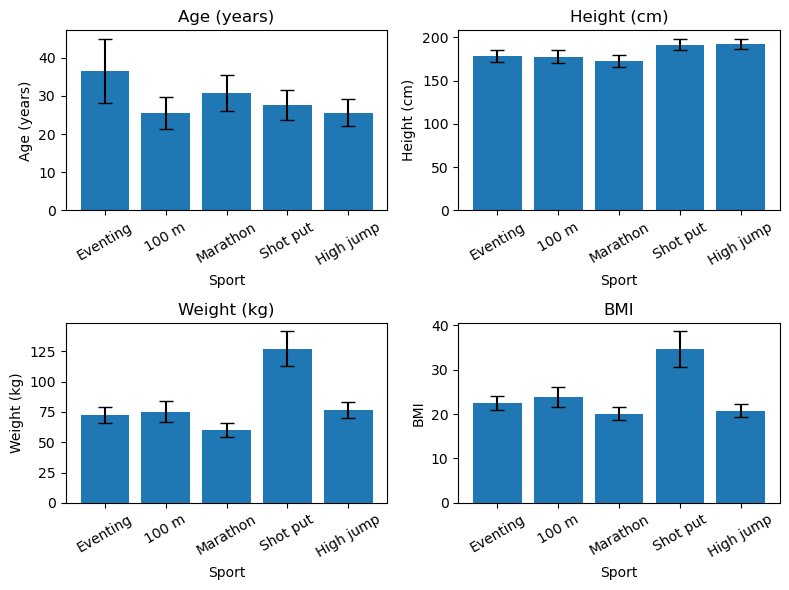

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize = (8,6))
for i in range(1,5):
    x_labels = ['Eventing', '100 m', 'Marathon', 'Shot put', 'High jump']
    sports = [biometrics_eventing, biometrics_men_100m, biometrics_men_marathon, biometrics_men_shot, biometrics_men_jump]
    biometrics_type = ['Age', 'height', 'weight_average', 'BMI']
    xlabels = ['Age (years)', 'Height (cm)', 'Weight (kg)', 'BMI']
    
    ax=plt.subplot(2,2,i)
    y_values = []
    error = []

    for sport in sports:
        mean = sport[biometrics_type[i-1]].mean()
        y_values.append(mean)
        std = sport[biometrics_type[i-1]].std()
        error.append(std)
    
    plt.bar(range(len(y_values)), y_values, yerr = error, capsize=5)
    ax.set_xticks(range(len(y_values)))
    ax.set_xticklabels(x_labels)
    plt.xticks(rotation = 30)
    plt.xlabel('Sport')
    plt.ylabel(xlabels[i-1])
    plt.title(xlabels[i-1])

plt.tight_layout()
plt.savefig('sport_comparison.png')
plt.show()
plt.clf()